In [1]:
%matplotlib inline

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

## Facial Key-Points detection

Taken from Kaggle (https://www.kaggle.com/c/facial-keypoints-detection): 

> The objective of this task is to predict keypoint positions on face images. This can be used as a building block in several applications, such as:
> 1. tracking faces in images and video
> 2. analysing facial expressions
> 3. detecting dysmorphic facial signs for medical diagnosis
> 4. biometrics / face recognition
>
> Detecing facial keypoints is a very challenging problem.  Facial features vary greatly from one individual to another, and even for a single individual, there is a large amount of variation due to 3D pose, size, position, viewing angle, and illumination conditions. Computer vision research has come a long way in addressing these difficulties, but there remain many opportunities for improvement.

In this project, we'll start with an EDA to identify important features, limitations and necessary transformations of our dataset. Then we will split the data into train, dev and test data to train models to evaluate different models.

## EDA

First we examine the data and types. Note that since there are a lot of columns, we've transponsed the rows here:

In [2]:
data = pd.read_csv('training.csv')
data.head(3).transpose()

,0,1,2
left_eye_center_x,66.0336,64.3329,65.0571
left_eye_center_y,39.0023,34.9701,34.9096
right_eye_center_x,30.227,29.9493,30.9038
right_eye_center_y,36.4217,33.4487,34.9096
left_eye_inner_corner_x,59.5821,58.8562,59.412
left_eye_inner_corner_y,39.6474,35.2743,36.321
left_eye_outer_corner_x,73.1303,70.7227,70.9844
left_eye_outer_corner_y,39.97,36.1872,36.321
right_eye_inner_corner_x,36.3566,36.0347,37.6781
right_eye_inner_corner_y,37.3894,34.3615,36.321


### Overview of data

In [3]:
pd.DataFrame({'type': data.dtypes})

,type
left_eye_center_x,float64
left_eye_center_y,float64
right_eye_center_x,float64
right_eye_center_y,float64
left_eye_inner_corner_x,float64
left_eye_inner_corner_y,float64
left_eye_outer_corner_x,float64
left_eye_outer_corner_y,float64
right_eye_inner_corner_x,float64
right_eye_inner_corner_y,float64


As it can be seen, each image has a vector of points for each facial feature. The Image itself has an `object` dtype, however, it appears to be a string when we access it. Let's convert it into a numpy array

In [4]:
print(type(data['Image'][0]))

<class 'str'>


In [5]:
data['Image_Matrix'] = data['Image'].apply(
    lambda x: np.array(x.split(' '), dtype=np.float)
)

data.head(3).transpose()

,0,1,2
left_eye_center_x,66.0336,64.3329,65.0571
left_eye_center_y,39.0023,34.9701,34.9096
right_eye_center_x,30.227,29.9493,30.9038
right_eye_center_y,36.4217,33.4487,34.9096
left_eye_inner_corner_x,59.5821,58.8562,59.412
left_eye_inner_corner_y,39.6474,35.2743,36.321
left_eye_outer_corner_x,73.1303,70.7227,70.9844
left_eye_outer_corner_y,39.97,36.1872,36.321
right_eye_inner_corner_x,36.3566,36.0347,37.6781
right_eye_inner_corner_y,37.3894,34.3615,36.321


Using this, we can plot some random images as examples

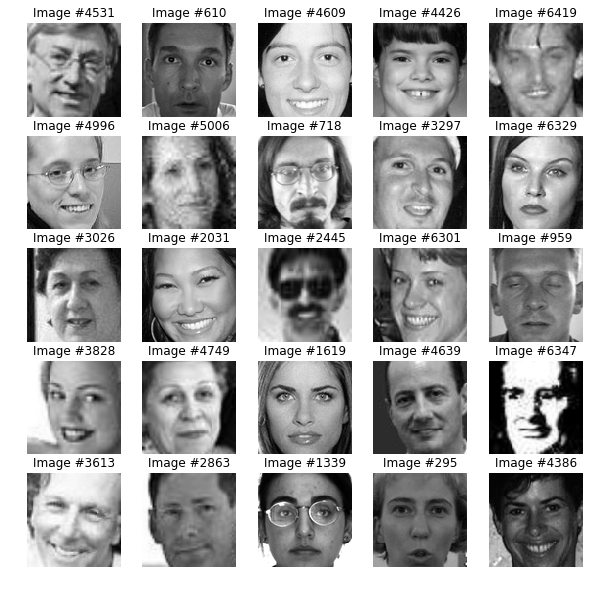

In [6]:
def plot_image_and_points(ax, image_vec, points_vec):
    ax.imshow(image_vec.reshape(96,96), cmap='gray')
    if points_vec is not None:
        coords = points_vec.reshape((15, 2))
        ax.plot(coords[:, 0], coords[:, 1], 'rx')
        

def plot_random(dataset, nrows, ncols):
    #Plot a random array of faces
    face_ids = np.random.randint(low=0, high=len(dataset), size=(nrows*ncols))
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for face_id, ax in zip(face_ids, axes.ravel()):
        plot_image_and_points(ax, dataset[face_id], None)
        ax.set_title("Image #{}".format(face_id))
        ax.axis('off')


plot_random(
    dataset=data['Image_Matrix'],
    nrows=5,
    ncols=5
)

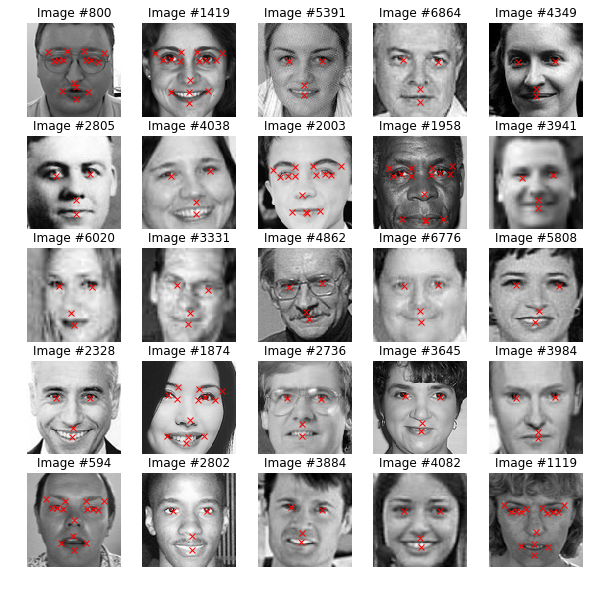

In [7]:
def plot_random_with_points(images, key_point_arrays, nrows, ncols):
    #Plot a random array of faces with markers
    face_ids = np.random.randint(low=0, high=len(images), size=(nrows*ncols))
    
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for face_id, ax in zip(face_ids, axes.ravel()):
        plot_image_and_points(ax, images[face_id], key_point_arrays[face_id])
        ax.set_title("Image #{}".format(face_id))
        ax.axis('off')


plot_random_with_points(
    images=data['Image_Matrix'],
    key_point_arrays=data.iloc[:, :-2].values,
    nrows=5,
    ncols=5
)

### Looking deeper into images

It appears as though a lot of images are grey-scaled photographs of real faces. They could have different expressions, and some even look at slightly different angles to the camera. However, it's worthwhile to note that all images seem to have the key-points within the frame of the image (more on that in the next section).

First, this is a good training example: centered, with all key points visible:

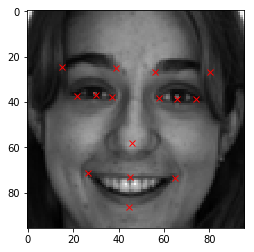

In [8]:
plot_image_and_points(plt, data['Image_Matrix'][1316], data.iloc[1316, :-2].values)

On the other hand, we have blurry or dark images with very few points visible

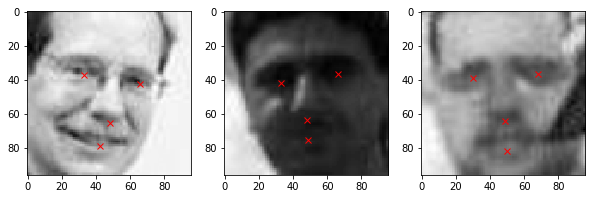

In [9]:
f, axes = plt.subplots(ncols=3, figsize=(10, 10))
for ax, face_id in zip(axes, [6232, 4703, 2909]):
    plot_image_and_points(ax, data['Image_Matrix'][face_id], data.iloc[face_id, :-2].values)

And then there are faces that are partially covered even though the visible key points are clear:

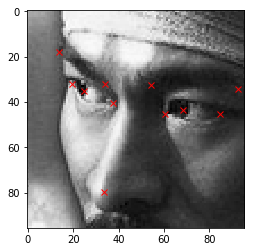

In [10]:
plot_image_and_points(plt, data['Image_Matrix'][1731], data.iloc[1731, :-2].values)

There are works of art in this data set as well. Some of these are faces from paintings, and as the fourth of the following examples show, they can be somewhat abstract or caricatural as well. Thus, we need to be robust to stylistic differences with how faces are depicted

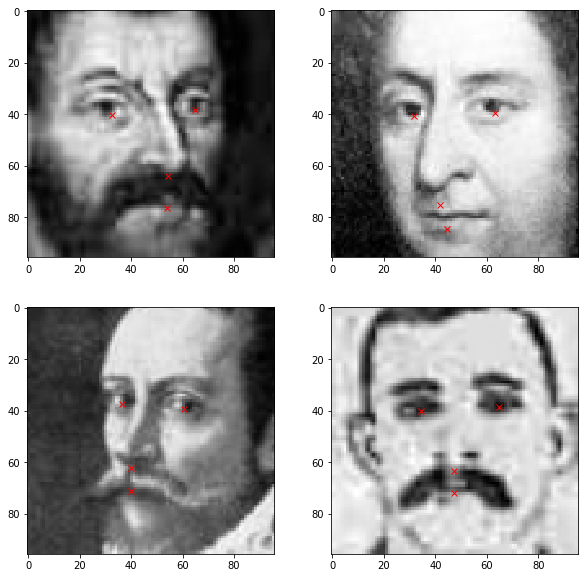

In [11]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))
for ax, face_id in zip(axes.ravel(), [2497, 5748, 3571, 4099]):
    plot_image_and_points(ax, data['Image_Matrix'][face_id], data.iloc[face_id, :-2].values)

Finally, we have a bunch of baby pictures. This shows age isn't a constant either

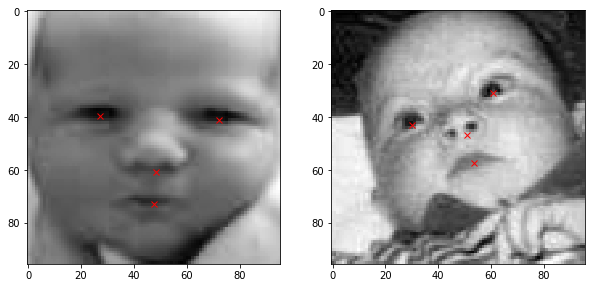

In [12]:
f, axes = plt.subplots(ncols=2, figsize=(10, 10))
for ax, face_id in zip(axes, [6136, 2831]):
    plot_image_and_points(ax, data['Image_Matrix'][face_id], data.iloc[face_id, :-2].values)

### Looking deeper into key points

As observed above, many key points are missing for a lot of images. This can also be seen in the counts in the summary here:

In [13]:
data.iloc[:, :-2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
left_eye_center_x,7039.0,66.359021,3.448233,22.763345,65.082895,66.497566,68.024752,94.689280
left_eye_center_y,7039.0,37.651234,3.152926,1.616512,35.900451,37.528055,39.258449,80.502649
right_eye_center_x,7036.0,30.306102,3.083230,0.686592,28.783339,30.251378,31.768334,85.039381
right_eye_center_y,7036.0,37.976943,3.033621,4.091264,36.327681,37.813273,39.566729,81.270911
left_eye_inner_corner_x,2271.0,59.159339,2.690354,19.064954,58.039339,59.304615,60.519810,84.440991
left_eye_inner_corner_y,2271.0,37.944752,2.307332,27.190098,36.626283,37.878040,39.260348,66.562559
left_eye_outer_corner_x,2267.0,73.330478,3.405852,27.571879,71.716503,73.247824,75.015645,95.258090
left_eye_outer_corner_y,2267.0,37.707008,2.881438,26.250023,36.085523,37.639015,39.373489,64.618230
right_eye_inner_corner_x,2268.0,36.652607,2.350268,5.751046,35.506126,36.651562,37.753571,70.714966
right_eye_inner_corner_y,2268.0,37.989902,2.311907,26.250023,36.766783,37.944075,39.192917,69.808803


Box plots show the variance and mean of the available points. Here we can observe some patterns suggestive of correlation between some key points, and large variances among others:
1 - the x and y values for mouth key points have similar, though not perfectly same ranges
2 - y values of inner key points for the eyes are similar
3 - outer key points for mouth, eyebrow and eye aren't similar, but seem to have similar ranges around opposite parts of the image

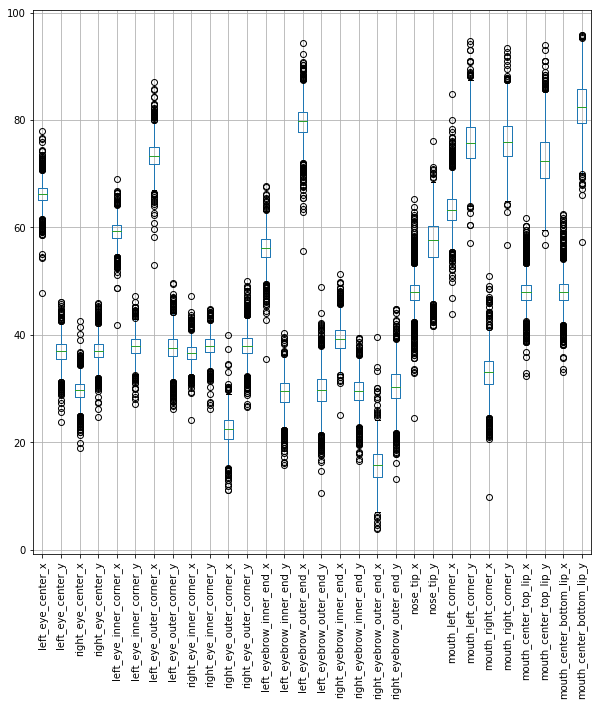

In [26]:
plt.figure(figsize=(10, 10))
data.iloc[:, :-2].boxplot()
plt.xticks(rotation=90);

Let's also look at a correlation matrix among those points. Here we can observe some cells have strong correlations above 0.8. Interestingly, most of the cells with more than 0.9 correlation appear to be y values like left-eye-inner-corner-y and left-eye-center-y. Correlations between similar x values aren't as strong and mostly appear to be in the range of 0.7-0.85. This could be because most of the faces seem to have good vertical orientation - most faces are straight and looking forward. However, most faces don't have consistent horizontal orientation with many people looking sideways into the camera.

In [27]:
data.iloc[:, :-2].corr().style.background_gradient()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
left_eye_center_x,1,0.04427,-0.0840758,-0.222582,0.754516,-0.00295772,0.813749,0.12293,0.0268247,-0.196615,-0.207249,-0.199957,0.455007,-0.157286,0.711163,-0.0237731,0.0112541,-0.258395,-0.179706,-0.300578,-0.00958801,0.0286427,0.249586,0.31539,-0.200541,0.195771,-0.0269535,0.185616,-0.0655183,0.383407
left_eye_center_y,0.04427,1,0.113036,0.313023,0.0866804,0.914588,0.0233023,0.952386,0.0740627,0.452702,0.110338,0.137364,0.112219,0.551823,0.130955,0.748777,0.273489,0.24011,0.156661,-0.0131061,-0.138,0.251183,-0.342958,0.480545,-0.382487,0.221354,-0.432244,0.239269,-0.467648,0.348579
right_eye_center_x,-0.0840758,0.113036,1,0.023501,0.0550008,0.116279,-0.272019,0.0769981,0.7293,0.065938,0.835179,-0.0305327,0.0948586,0.149993,-0.298361,0.121937,0.397787,0.156091,0.754719,0.0288962,0.0674479,-0.0135197,-0.0991627,-0.212519,0.318575,-0.272671,0.104975,-0.133666,0.0722438,-0.305875
right_eye_center_y,-0.222582,0.313023,0.023501,1,-0.256837,0.441945,-0.147801,0.146126,0.00168862,0.907658,-0.000741564,0.948232,-0.361724,0.26144,-0.239742,0.0230814,-0.201889,0.530075,-0.0793771,0.728471,0.0698563,0.124085,0.388261,0.0819743,0.288647,0.389181,0.383291,0.194625,0.431282,0.119883
left_eye_inner_corner_x,0.754516,0.0866804,0.0550008,-0.256837,1,-0.0534229,0.446617,0.155482,-0.084485,-0.285032,0.173729,-0.254108,0.624016,-0.184756,0.441779,0.0403026,0.115283,-0.330449,0.113468,-0.316455,0.142679,-0.141352,0.0484401,0.14078,0.000568479,-0.0161288,0.0374775,-0.13534,-0.0192726,0.310754
left_eye_inner_corner_y,-0.00295772,0.914588,0.116279,0.441945,-0.0534229,1,0.0504868,0.860034,0.142741,0.649016,0.0427396,0.295358,-0.0160894,0.624363,0.111732,0.666238,0.222557,0.3982,0.0775368,0.133081,-0.112774,0.372452,-0.194507,0.502702,-0.320977,0.338989,-0.30421,0.389135,-0.331878,0.338045
left_eye_outer_corner_x,0.813749,0.0233023,-0.272019,-0.147801,0.446617,0.0504868,1,0.0995995,0.125051,-0.0780095,-0.501609,-0.114095,0.233138,-0.114453,0.813418,-0.0600229,0.0160449,-0.173037,-0.392734,-0.23665,-0.0844082,0.183013,0.383975,0.349385,-0.335269,0.268995,-0.0413368,0.353949,-0.0556139,0.348225
left_eye_outer_corner_y,0.12293,0.952386,0.0769981,0.146126,0.155482,0.860034,0.0995995,1,0.0604305,0.315153,0.0762823,0.0125,0.173806,0.475913,0.221803,0.793615,0.305345,0.112428,0.142266,-0.111632,-0.176866,0.182261,-0.407129,0.507948,-0.457384,0.185653,-0.524054,0.199386,-0.563855,0.352189
right_eye_inner_corner_x,0.0268247,0.0740627,0.7293,0.00168862,-0.084485,0.142741,0.125051,0.0604305,1,0.117989,0.427008,-0.0226312,0.0903817,0.159805,-0.00424135,0.0722083,0.502369,0.160298,0.454185,0.0223351,0.160964,0.12878,0.124986,-0.0925773,0.10367,-0.138768,0.1573,0.12813,0.122423,-0.273316
right_eye_inner_corner_y,-0.196615,0.452702,0.065938,0.907658,-0.285032,0.649016,-0.0780095,0.315153,0.117989,1,-0.0262928,0.843493,-0.328717,0.429332,-0.153513,0.183101,-0.0861009,0.608847,-0.0694303,0.641471,0.0321364,0.282343,0.305019,0.225433,0.126908,0.447518,0.248851,0.360308,0.277138,0.175623


Here we can visualize the distribution of key points. The left image contains a sample of points to show how key points vary. The right image shows the average value of facial key points alone.

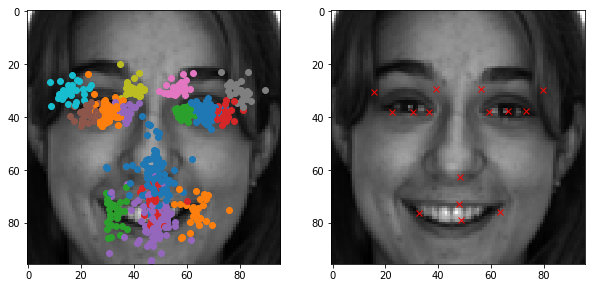

In [15]:
f, axes = plt.subplots(ncols=2, figsize=(10, 10))


# plot a sample of points
axes[0].imshow(data['Image_Matrix'][1316].reshape(96,96), cmap='gray')
for row_num in np.random.randint(len(data), size=100):
    row = data.iloc[row_num, :-2].values
    points = row.reshape(15, 2)
    for idx, point in enumerate(points):
        axes[0].scatter(point[0], point[1], color='C' + str(idx % 10))


# plot the mean values we computed above
plot_image_and_points(axes[1], data['Image_Matrix'][1316], data.iloc[:, :-2].mean().values)

We can visually support some of the observations we made earlier about correlations between different points

### Missing data:

It appears as though some rows also have some missing values for some columns 

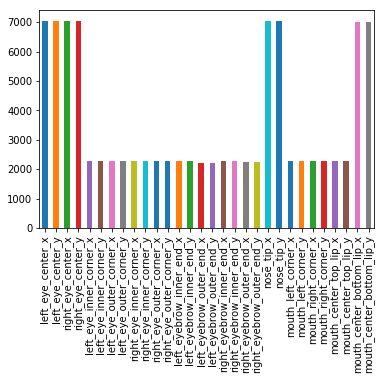

In [16]:
# Files appear to be organized with NaNs at the end
# plot a bar of values to position of the data
data.describe().loc['count'].plot.bar();

Particularly, we've noticed that the data in the lower rows tend to have missing values. Below is the first and last row of the dataset as examples:

,0,7048
left_eye_center_x,66.0336,66.9383
left_eye_center_y,39.0023,43.4245
right_eye_center_x,30.227,31.0961
right_eye_center_y,36.4217,39.5286
left_eye_inner_corner_x,59.5821,NaN
left_eye_inner_corner_y,39.6474,NaN
left_eye_outer_corner_x,73.1303,NaN
left_eye_outer_corner_y,39.97,NaN
right_eye_inner_corner_x,36.3566,NaN
right_eye_inner_corner_y,37.3894,NaN


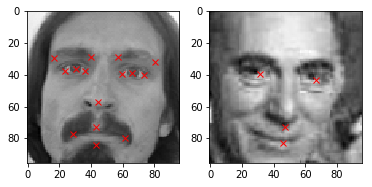

In [17]:
# first and last row plotted
f, axes = plt.subplots(nrows=1, ncols=2)
plot_image_and_points(axes[0], data['Image_Matrix'][0], data.iloc[0, :-2].values)
plot_image_and_points(axes[1], data['Image_Matrix'][len(data)-1], data.iloc[len(data)-1, :-2].values)

# dataframe for reference
data.iloc[[0, -1]].transpose()

This can be more clearly seen if we plot the different columns as a line graph, where x is the position in the dataframe

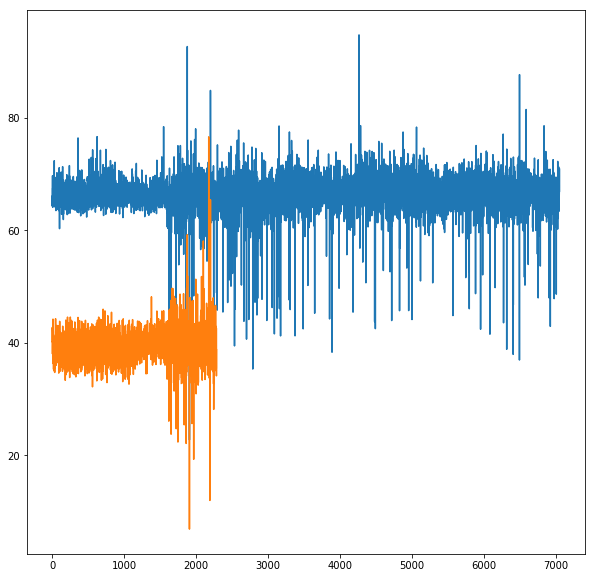

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(data[['left_eye_center_x', 'right_eyebrow_inner_end_x']])
plt.show();

For the sake of this project, we're only using complete examples. Alternatively, we could have tried to model fewer facial key points, the ones that all rows contain, but we think that's a less interesting problem to solve. However, we certainly cannot impute key points in missing columns since they don't have  

We also have more than 2000 complete complete in our dataset

In [19]:
data = data.dropna()
len(data)

2140

### Summary

In Summary, images have a few quirks:
1. Many images had centered faces with all key points visible
2. Many are blurry images (?CAN WE EVALUATE THIS STATISTICALLY?)
3. Some don't have enough key points visible in the image
4. Many are artworks - so we need to remove stylistic features from our analyses as well
5. Age is not a factor

Key points are interesting in that we can

## Modelling

First we need to split the data into test and train. The loss function is RMSE

TODO: FLESH THIS OUT

We'll also use the following metrics for different approaches

In [28]:
_metrics = [
    metrics.mean_absolute_error,
    metrics.mean_squared_error,
    metrics.mean_squared_log_error,
    metrics.r2_score
]

global all_results
all_results = None

def measure_all(method_name, true, pred):
    # create temporary dataframe of results
    temp_df = pd.DataFrame({
        'method': method_name,
        **{
            func.__name__: [func(true, pred)]
            for func in _metrics
        }
    })
    
    # append it to all_results
    global all_results
    if all_results:
        all_results.append(temp_df)
    else:
        all_results = temp_df
    
    # return it for displaying purposes
    return all_results

### Baseline - predicting the mean value for any image

This is a simple model that only predicts the same mean value for each test X value

In [21]:
class MeanValueModel():
    def __init__(self):
        self.means = None
        
    def fit(self, X, Y):
        self.means = np.apply_along_axis(np.mean, 0, Y)
        
    def predict(self, X):
        return np.tile(self.means, len(X)).reshape((len(X), len(self.means)))


complete_train, complete_test = train_test_split(data.dropna(), test_size=0.2)

mvm = MeanValueModel()
mvm.fit(complete_train['Image_Matrix'].values, complete_train.iloc[:, :-2].values)

predicted = mvm.predict(complete_test['Image_Matrix'].values)
predicted

array([[66.21846787, 36.85207026, 29.6198659 , ..., 72.68550115,
        48.15968914, 82.66887805],
       [66.21846787, 36.85207026, 29.6198659 , ..., 72.68550115,
        48.15968914, 82.66887805],
       [66.21846787, 36.85207026, 29.6198659 , ..., 72.68550115,
        48.15968914, 82.66887805],
       ...,
       [66.21846787, 36.85207026, 29.6198659 , ..., 72.68550115,
        48.15968914, 82.66887805],
       [66.21846787, 36.85207026, 29.6198659 , ..., 72.68550115,
        48.15968914, 82.66887805],
       [66.21846787, 36.85207026, 29.6198659 , ..., 72.68550115,
        48.15968914, 82.66887805]])

In [22]:
# since this is the first measurement we're doing, we set this as the all_results thing
measure_all('baseline', complete_test.iloc[:, :-2].values, predicted)

,method,mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score
0,baseline,2.348189,10.534325,0.006472,-0.001341


### K-Nearest Regression - similar images might have similar key points